In [1]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import itertools


Populating the interactive namespace from numpy and matplotlib


In [2]:
'''
z = np.full(shape=2**n_features, fill_value=n_samples)

X1,_ = datasets.make_blobs(n_samples=z, n_features=3, centers=c[0:n_clu:2, :], cluster_std=0.5)
X2,_ = datasets.make_blobs(n_samples=z, n_features=3, centers=c[1:n_clu:2, :], cluster_std=0.5)
y1 = np.zeros((int) (n * n_clu / 2))
y2 = np.ones((int) (n * n_clu / 2))

X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

scatter(X[:,0], X[:,1], c=y, alpha=0.5, edgecolor='none');
'''

"\nz = np.full(shape=2**n_features, fill_value=n_samples)\n\nX1,_ = datasets.make_blobs(n_samples=z, n_features=3, centers=c[0:n_clu:2, :], cluster_std=0.5)\nX2,_ = datasets.make_blobs(n_samples=z, n_features=3, centers=c[1:n_clu:2, :], cluster_std=0.5)\ny1 = np.zeros((int) (n * n_clu / 2))\ny2 = np.ones((int) (n * n_clu / 2))\n\nX = np.concatenate((X1, X2))\ny = np.concatenate((y1, y2))\n\nscatter(X[:,0], X[:,1], c=y, alpha=0.5, edgecolor='none');\n"

In [3]:
def make_GaussXOR(n_samples, n_features):
    n = int(n_samples / 4)
    f = n_features
    c = np.array(list(itertools.product([0.5, -0.5], repeat=f)))
    
    for i in range(2**f):
        X1,_ = datasets.make_blobs(n_samples=n, n_features=f, centers=c[i, :].reshape(1, -1), cluster_std=0.25)
    
        d = c[i]
        if len(d[d < 0]) % 2 == 0:
            y1 = np.ones(n)
        else:
            y1 = np.zeros(n)
    
        if i == 0:
            X, y = X1, y1
        else:
            X,y = np.concatenate((X, X1)), np.concatenate((y, y1))
        
    return X,y

In [4]:
X,y = make_GaussXOR(750, 2)

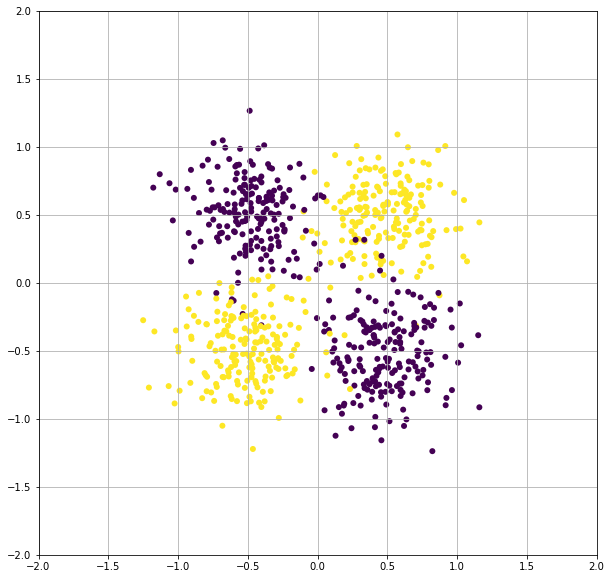

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], c=y, edgecolor='none');
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.grid(which='major', axis='both')

In [6]:
m = X.T.mean(axis=1) # calculate the mean of each row
m = m[:, np.newaxis] # reshape the mean
M = X.T - m # normalization
C = M.dot(M.T) / (M.shape[1] - 1) # calculate the covariance matrix 

print('\nCovariance Matrix: \n')
print(C)
print('\nMean: \n')
print(m)


Covariance Matrix: 

[[ 0.30317778 -0.00285202]
 [-0.00285202  0.32331811]]

Mean: 

[[-0.00443831]
 [ 0.00278581]]
